In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pyproj import Proj
import shapefile
import pandas as pd
import utm

## Catchment And Stations

In [2]:

shpFilePath = 'Narayani_catchment/watershed.shp'  
listx=[]
listy=[]
shp_file = shapefile.Reader(shpFilePath)
for sr in shp_file.shapeRecords():
    for xNew,yNew in sr.shape.points:
        listx.append(xNew) # longitude
        listy.append(yNew) # latitude

In [3]:
DATA = pd.read_table('station_loc.txt')
display(DATA)

,S.N,Station_id,Station_name,Latitude,Longitude,Altitude_m
0,1,607,Lete,28.38,83.36,2384
1,2,804,Pohara,28.13,84.00,827
2,3,814,Lumle,28.18,83.48,1740
3,4,902,Rampur,27.37,84.25,256
4,5,1055,Dhunche,28.06,85.18,1982


**Making shapefile from Metric units to Longi and Latidude with proj:** 

In [4]:
myProj = Proj("+proj=utm +zone=45K, +north +ellps=WGS84 +datum=WGS84 +units=m +no_defs")
long, lati = myProj(listx, listy, inverse=True)


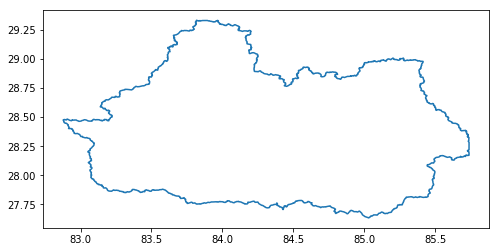

In [5]:
plt.figure(figsize=(8,4))
plt.plot(long,lati)
plt.show()

## Placement of Stations :

### Data

#### Change the coordinates from, Degrees Minutes Seconds to Degrees Lat Long

In [6]:
# Weahter stations
DATA['Longitude']=(['83.63','84.00','83.80','84.42','85.30']) 
DATA['Latitude']=(['28.63','28.22','28.30','27.28','28.10'])

In [7]:
# Discharge stations
DATA['dis_sta_id']=(['420','430','445','447','450'])
DATA['dis_lat']=(['27.75','28.23','28.04','27.97','27.71'])
DATA['dis_lon']=(['84.34','84.00','84.81','85.18','84.43'])


In [8]:
display(DATA)

,S.N,Station_id,Station_name,Latitude,Longitude,Altitude_m,dis_sta_id,dis_lat,dis_lon
0,1,607,Lete,28.63,83.63,2384,420,27.75,84.34
1,2,804,Pohara,28.22,84.00,827,430,28.23,84.00
2,3,814,Lumle,28.30,83.80,1740,445,28.04,84.81
3,4,902,Rampur,27.28,84.42,256,447,27.97,85.18
4,5,1055,Dhunche,28.10,85.30,1982,450,27.71,84.43


In [9]:
Sta_name=DATA['Station_name']
Sta_id=DATA['Station_id']
Sta_alt=DATA['Altitude_m'] 
lon=pd.to_numeric(DATA['Longitude'])
lat=pd.to_numeric(DATA['Latitude'])

#### With ID

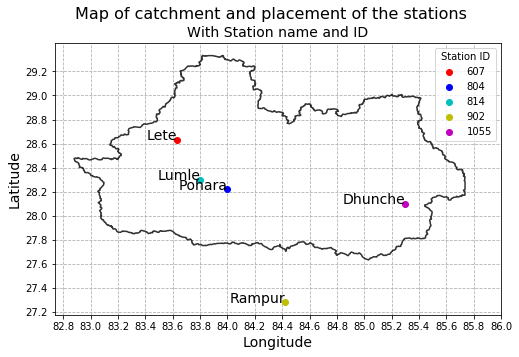

In [10]:
C=(['ro','bo','co','yo','mo'])
plt.figure(figsize=(8,5))
plt.plot(long,lati,'k',alpha=0.8)

for i in range(5):
    plt.plot(lon[i],lat[i],C[i],label=Sta_id[i])
    plt.annotate(Sta_name[i], (lon[i], lat[i]),size=14,horizontalalignment='right')

plt.legend(title='Station ID', loc='upper right')
plt.suptitle('Map of catchment and placement of the stations',size=16)
plt.title('With Station name and ID',size=14)
plt.xlabel('Longitude',size=14)
plt.ylabel('Latitude',size=14)
plt.xticks(np.arange(82.8, 86, step=0.2))
plt.yticks(np.arange(27.2, 29.4, step=0.2))    
plt.grid(True,linestyle='--')
plt.show()
    

** Placement of Stations with Altitude in catchment:**

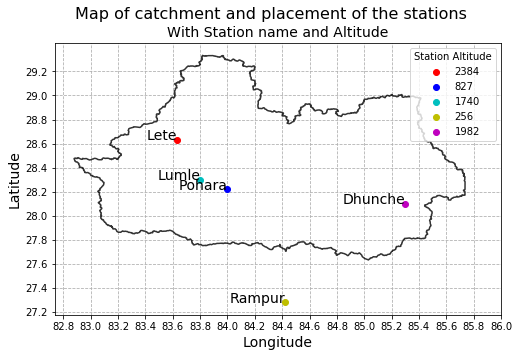

In [11]:
C=(['ro','bo','co','yo','mo'])
plt.figure(figsize=(8,5))
plt.plot(long,lati,'k',alpha=0.8)
for i in range(5):
    plt.plot(lon[i],lat[i],C[i],label=Sta_alt[i])
    plt.annotate(Sta_name[i], (lon[i], lat[i]),size=14,horizontalalignment='right')

plt.legend(title='Station Altitude',loc='upper right')
plt.suptitle('Map of catchment and placement of the stations',size=16)
plt.title('With Station name and Altitude',size=14)
plt.xlabel('Longitude',size=14)
plt.ylabel('Latitude',size=14)
plt.xticks(np.arange(82.8, 86, step=0.2))
plt.yticks(np.arange(27.2, 29.4, step=0.2))    
plt.grid(True,linestyle='--')
plt.show()
    

### Map of Weahter stations and discharge stations

In [12]:
wea_sta_name=DATA['Station_name']
dis_sta_id=DATA['dis_sta_id']
dis_lon=DATA['dis_lon']
dis_lat=DATA['dis_lat']

dis_lon=pd.to_numeric(dis_lon)
dis_lat=pd.to_numeric(dis_lat)

84.34 27.75
84.0 28.23
84.81 28.04
85.18 27.97
84.43 27.71


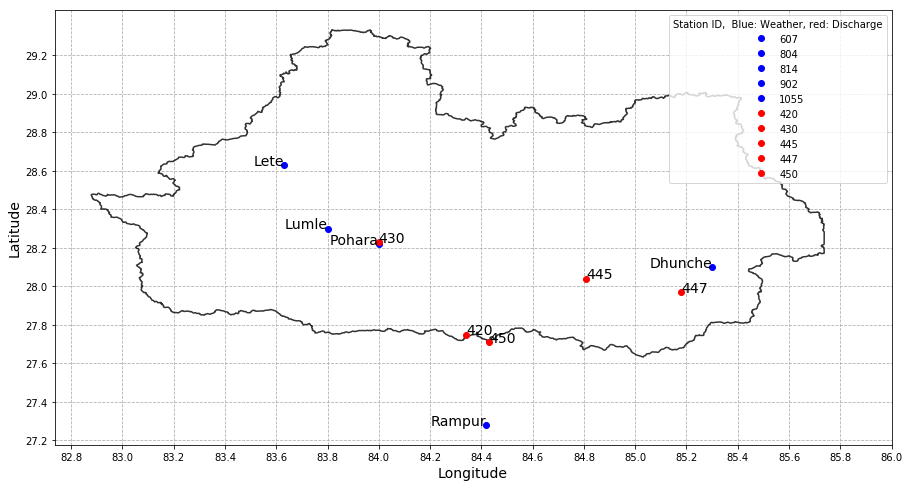

In [13]:
C=(['ro','bo','co','yo','mo'])
F=(['tano','bo','co','yo','mo'])

plt.figure(figsize=(15,8))

plt.plot(long,lati,'k',alpha=0.8)

for i in range(5):
    plt.plot(lon[i],lat[i],'bo',label=Sta_id[i])
    plt.annotate(wea_sta_name[i], (lon[i], lat[i]),size=14,horizontalalignment='right')
    #print(lon[i], lat[i])

plt.legend(title=' Weather Station ID', loc='lower left')
for i in range(5):
    print(dis_lon[i], dis_lat[i])
    plt.plot(dis_lon[i],dis_lat[i],'ro', label=dis_sta_id[i])
    plt.annotate(dis_sta_id[i], (dis_lon[i], dis_lat[i]),size=14,horizontalalignment='left')

plt.legend(title='Station ID,  Blue: Weather, red: Discharge', loc='upper right')
plt.xlabel('Longitude',size=14)
plt.ylabel('Latitude',size=14)
plt.xticks(np.arange(82.8, 86, step=0.2))
plt.yticks(np.arange(27.2, 29.4, step=0.2))    
plt.grid(True,linestyle='--')
plt.show()
